In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [182]:
diaries = pd.read_csv('Dades_di_ries_de_COVID-19_per_comarca.csv', decimal=",", thousands=".")
setmanals = pd.read_csv('Dades_setmanals_de_COVID-19_per_comarca.csv', decimal=",", thousands=".")
poblacions = pd.read_csv('poblacions.csv')


In [53]:
poblacions.head()

,NOM,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981
0,Alt Camp,45183,45198,44864,44424,44168,44038,44068,44225,44495,...,33997,34024,33931,33843,33820,33634,33456,33264,33018,32769
1,Alt Empordà,141432,140429,139359,137951,136981,136522,136384,136338,137005,...,90059,88618,87423,86296,85369,84519,83573,82690,81700,80725
2,Alt Penedès,111221,110502,109784,108339,107724,106438,105705,105399,105448,...,69329,68495,68131,67502,66987,66533,66120,65748,65318,64803
3,Alt Urgell,20237,20240,20009,20155,20201,20220,20428,20568,20761,...,19098,18951,18885,18867,18885,19077,19199,19294,19265,19338
4,Alta Ribagorça,3993,3972,3856,3820,3813,3840,3859,3912,3929,...,3478,3503,3583,3626,3627,3824,4010,4180,4357,4545


In [54]:
diaries.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS
0,MONTSIA,22,26/11/2020,Home,80 o més,No,0,8,0,0,3,1,0
1,ALTA RIBAGORÇA,05,16/06/2022,Dona,80 o més,No,0,0,0,0,0,0,0
2,SOLSONES,35,27/05/2022,Home,0 a 9,No,0,0,0,0,0,0,0
3,MARESME,21,20/01/2021,Home,50 a 59,No,16,260,2,0,13,4,0
4,VALLES ORIENTAL,41,26/08/2021,Dona,NaN,No,0,10,0,0,3,0,1


In [55]:
setmanals.head()

,NOM,CODI,DATA_INI,DATA_FI,RESIDENCIA,IEPG_CONFIRMAT,R0_CONFIRMAT_M,TAXA_CASOS_CONFIRMAT,CASOS_CONFIRMAT,TAXA_PCR,PCR,PERC_PCR_POSITIVES,INGRESSOS_TOTAL,INGRESSOS_CRITIC,EXITUS
0,BAIX EMPORDA,10,28/02/2021,06/03/2021,Si,NaN,NaN,106.1571,1,14118.8959,133,0.8130,0,0,0
1,PLA D'URGELL,27,30/07/2021,05/08/2021,No,433.179,0.761785,213.3959,80,3035.5570,1138,9.1102,8,1,0
2,BAIX EMPORDA,10,09/05/2021,15/05/2021,No,162.564,0.741790,78.7337,106,1887.3810,2541,4.7199,16,1,0
3,BAGES,07,18/01/2021,24/01/2021,No,475.852,0.848969,230.5222,415,4596.5582,8275,5.3609,78,5,7
4,BAGES,07,09/04/2021,15/04/2021,Si,NaN,NaN,41.5973,1,4866.8885,117,3.0928,2,0,0


In [56]:
diaries['CASOS_CONFIRMAT'].sum(), setmanals['CASOS_CONFIRMAT'].sum(), diaries['DATA'].min(), setmanals['DATA_INI'].min(), diaries['DATA'].max(), setmanals['DATA_FI'].max(),

(2667357, 18633570, '01/01/2021', '01/01/2021', '31/12/2021', '31/12/2021')

In [151]:
# Limpiar
setmanals['NOM'] = setmanals['NOM'].apply(lambda x: unidecode(str(x).upper()))
diaries['NOM'] = diaries['NOM'].apply(lambda x: unidecode(str(x).upper()))
poblacions['NOM'] = poblacions['NOM'].apply(lambda x: unidecode(str(x).upper()))

poblacions.loc[6, 'NOM'] = 'VALL D\'ARAN'
poblacions = poblacions.sort_values(by='NOM').reset_index()
setmanals['CASOS_CONFIRMAT'] = setmanals['CASOS_CONFIRMAT'].astype(float)



diaries['NOM'].unique()

array(['MONTSIA', 'ALTA RIBAGORCA', 'SOLSONES', 'MARESME',
       'VALLES ORIENTAL', 'BAIX EMPORDA', 'BARCELONES', 'GARRAF',
       'MOIANES', 'URGELL', "PLA D'URGELL", 'BAIX CAMP', 'CERDANYA',
       'ANOIA', 'NOGUERA', 'BERGUEDA', 'SEGRIA', 'BAGES', 'TERRA ALTA',
       'ALT PENEDES', 'ALT URGELL', 'VALLES OCCIDENTAL',
       'CONCA DE BARBERA', 'PALLARS SOBIRA', 'BAIX EBRE', 'BAIX PENEDES',
       'ALT EMPORDA', 'GARRIGUES', 'OSONA', 'RIPOLLES', "RIBERA D'EBRE",
       "PLA DE L'ESTANY", 'SEGARRA', 'GARROTXA', 'SELVA', 'PALLARS JUSSA',
       'TARRAGONES', 'PRIORAT', 'GIRONES', 'ALT CAMP', "VALL D'ARAN",
       'BAIX LLOBREGAT', 'SENSE ESPECIFICAR'], dtype=object)

In [133]:
diaries['SEXE'].unique()

array(['Home', 'Dona', 'Tots', 'Altres'], dtype=object)

In [165]:
#################################################
##########Generar barras##########################
################################################3
#################################################
prueba = diaries.groupby(['NOM','SEXE',	'GRUP_EDAT'])['EXITUS'].apply(lambda x : x.astype(int).sum()).reset_index()
prueba = prueba.loc[prueba['NOM'] != 'SENSE ESPECIFICAR'].reset_index()

prueba['SEXE'] = prueba['SEXE'].str.replace('Home','Hombre')
prueba['SEXE'] = prueba['SEXE'].str.replace('Dona','Mujer')
prueba['SEXE'] = prueba['SEXE'].str.replace('Tots','Residencia')
prueba['GRUP_EDAT'] = prueba['GRUP_EDAT'].str.replace('Tots','Residencia')
prueba['GRUP_EDAT'] = prueba['GRUP_EDAT'].str.replace('80 o més','80 o más')

tasa = []
tasa_crit = []
for i in range(len(prueba)):
    tasa.append(prueba.loc[i, 'EXITUS'] / poblacions.loc[poblacions['NOM'] ==  prueba.loc[i, 'NOM']]['2022'].iloc[0])

prueba['Tasa (muertes/población)'] = tasa
prueba

,index,NOM,SEXE,GRUP_EDAT,EXITUS,Tasa (muertes/población)
0,0,ALT CAMP,Mujer,0 a 9,0,0.000000
1,1,ALT CAMP,Mujer,10 a 19,0,0.000000
2,2,ALT CAMP,Mujer,20 a 29,0,0.000000
3,3,ALT CAMP,Mujer,30 a 39,0,0.000000
4,4,ALT CAMP,Mujer,40 a 49,0,0.000000
...,...,...,...,...,...,...
793,793,VALLES ORIENTAL,Hombre,50 a 59,22,0.000053
794,794,VALLES ORIENTAL,Hombre,60 a 69,72,0.000173
795,795,VALLES ORIENTAL,Hombre,70 a 79,155,0.000371
796,796,VALLES ORIENTAL,Hombre,80 o más,174,0.000417


In [167]:
#################################################
##########Generar mapa##########################
################################################3
#################################################
prueba = diaries.groupby(['NOM'])['EXITUS'].apply(lambda x : x.astype(int).sum()).reset_index()
prueba = prueba.loc[prueba['NOM'] != 'SENSE ESPECIFICAR'].reset_index()

tasa = []
tasa_crit = []
pob = []
for i in range(len(prueba)):
    tasa.append(prueba.loc[i, 'EXITUS'] / poblacions.loc[poblacions['NOM'] ==  prueba.loc[i, 'NOM']]['2022'].iloc[0])
    pob.append(poblacions.loc[poblacions['NOM'] ==  prueba.loc[i, 'NOM']]['2022'].iloc[0])

prueba['Tasa (muertes/población)'] = tasa
prueba['Población'] = pob
prueba

,index,NOM,EXITUS,Tasa (muertes/población),Población
0,0,ALT CAMP,109,0.002412,45183
1,1,ALT EMPORDA,358,0.002531,141432
2,2,ALT PENEDES,370,0.003327,111221
3,3,ALT URGELL,46,0.002273,20237
4,4,ALTA RIBAGORCA,8,0.002004,3993
5,5,ANOIA,686,0.005467,125489
6,6,BAGES,960,0.005336,179896
7,7,BAIX CAMP,495,0.002501,197926
8,8,BAIX EBRE,120,0.001511,79394
9,9,BAIX EMPORDA,317,0.002319,136719


In [85]:
poblacions.to_csv('poblacions2022.csv')

In [166]:
prueba.to_csv('muertes_completo.csv')

In [168]:
prueba.to_csv('muertes_map.csv')

In [169]:
diaries_format = setmanals.loc[diaries['NOM'] != 'SENSE ESPECIFICAR'].reset_index()

diaries_format['SEXE'] = diaries_format['SEXE'].str.replace('Home','Hombre')
diaries_format['SEXE'] = diaries_format['SEXE'].str.replace('Dona','Mujer')
diaries_format['SEXE'] = diaries_format['SEXE'].str.replace('Tots','Residencia')
diaries_format['GRUP_EDAT'] = diaries_format['GRUP_EDAT'].str.replace('Tots','Residencia')
diaries_format['GRUP_EDAT'] = diaries_format['GRUP_EDAT'].str.replace('80 o més','80 o más')
diaries_format

,index,NOM,CODI,DATA,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS
0,0,MONTSIA,22,26/11/2020,Hombre,80 o más,No,0,8,0,0,3,1,0
1,1,ALTA RIBAGORCA,05,16/06/2022,Mujer,80 o más,No,0,0,0,0,0,0,0
2,2,SOLSONES,35,27/05/2022,Hombre,0 a 9,No,0,0,0,0,0,0,0
3,3,MARESME,21,20/01/2021,Hombre,50 a 59,No,16,260,2,0,13,4,0
4,4,VALLES ORIENTAL,41,26/08/2021,Mujer,NaN,No,0,10,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772627,773503,MONTSIA,22,22/10/2020,Hombre,50 a 59,No,4,34,0,0,0,0,0
772628,773504,BAIX CAMP,08,04/04/2022,Mujer,70 a 79,No,4,37,0,0,1,0,0
772629,773505,GARRAF,17,07/01/2022,Hombre,70 a 79,No,11,43,2,0,6,1,0
772630,773506,GIRONES,20,26/02/2022,Hombre,80 o más,No,3,8,0,0,3,1,0


In [171]:
diaries_format.to_csv('diaries_format.csv')

In [183]:
setmanals['DATA_FI_f'] = pd.to_datetime(setmanals['DATA_FI'])
setmanals = setmanals.sort_values(by='DATA_FI_f')
setmanals

,NOM,CODI,DATA_INI,DATA_FI,RESIDENCIA,IEPG_CONFIRMAT,R0_CONFIRMAT_M,TAXA_CASOS_CONFIRMAT,CASOS_CONFIRMAT,TAXA_PCR,PCR,PERC_PCR_POSITIVES,INGRESSOS_TOTAL,INGRESSOS_CRITIC,EXITUS,DATA_FI_f
63236,BARCELONES,13,24/02/2020,01/03/2020,No,NaN,NaN,0.1718,4,0.4296,10,0.0000,0,0,0,2020-01-03
8708,OSONA,24,24/02/2020,01/03/2020,No,NaN,NaN,0.0000,0,0.0000,0,0.0000,0,0,0,2020-01-03
6129,PLA DE L'ESTANY,28,24/02/2020,01/03/2020,No,NaN,NaN,0.0000,0,0.0000,0,0.0000,0,0,0,2020-01-03
8573,MONTSIA,22,24/02/2020,01/03/2020,No,NaN,NaN,0.0000,0,0.0000,0,0.0000,0,0,0,2020-01-03
67688,GIRONES,20,24/02/2020,01/03/2020,No,NaN,NaN,0.9962,2,0.0000,0,0.0000,0,0,0,2020-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19290,Sense especificar,SES,06/07/2022,12/07/2022,--,NaN,NaN,0.0000,545,0.0000,4680,10.4078,109,11,1,2022-12-07
43472,ALT EMPORDA,02,06/07/2022,12/07/2022,No,198.814,0.775174,102.1370,143,579.9668,812,26.1386,29,4,2,2022-12-07
24315,PRIORAT,29,06/07/2022,12/07/2022,Si,NaN,NaN,543.4782,1,15217.3913,28,10.0000,0,0,0,2022-12-07
15638,VALL D'ARAN,39,06/07/2022,12/07/2022,Si,NaN,NaN,2500.0000,1,12500.0000,5,100.0000,1,0,0,2022-12-07


In [187]:
setmanals[['NOM','DATA_FI_f','RESIDENCIA','TAXA_CASOS_CONFIRMAT','CASOS_CONFIRMAT','TAXA_PCR','PCR','PERC_PCR_POSITIVES','INGRESSOS_TOTAL','INGRESSOS_CRITIC','EXITUS']].to_csv('setmanals_format.csv')

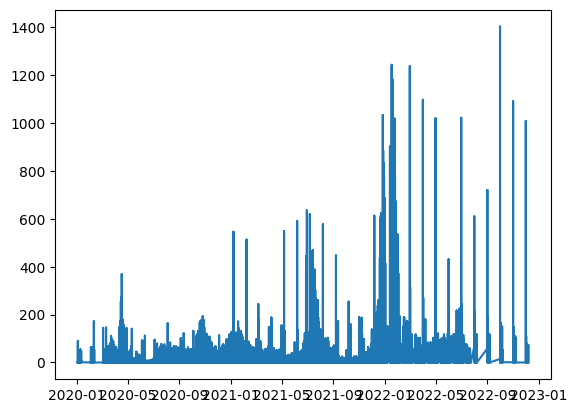

In [197]:
plt.plot(diaries['DATA_f'], diaries['CASOS_CONFIRMAT'])
plt.show()

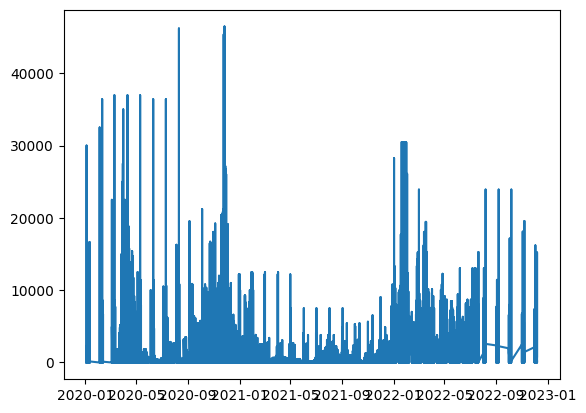

In [198]:
plt.plot(setmanals['DATA_FI_f'], setmanals['TAXA_CASOS_CONFIRMAT'])
plt.show()

In [192]:
diaries['DATA_f'] = pd.to_datetime(diaries['DATA'])
diaries = diaries.sort_values(by='DATA_f')
diaries

,NOM,CODI,DATA,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,DATA_f
507983,BARCELONES,13,01/03/2020,Home,NaN,No,0,0,0,0,0,0,0,2020-01-03
569140,PLA DE L'ESTANY,28,01/03/2020,Home,20 a 29,No,0,0,0,0,0,0,0,2020-01-03
306130,GARROTXA,19,01/03/2020,Dona,60 a 69,No,0,0,0,0,0,0,0,2020-01-03
453541,VALLES ORIENTAL,41,01/03/2020,Home,20 a 29,No,0,0,0,0,0,0,0,2020-01-03
306272,OSONA,24,01/03/2020,Dona,70 a 79,No,0,0,0,0,0,0,0,2020-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518359,MARESME,21,12/07/2022,Dona,NaN,No,1,12,0,0,14,0,0,2022-12-07
701440,BAGES,07,12/07/2022,Dona,80 o més,No,4,14,3,0,8,0,0,2022-12-07
742619,BERGUEDA,14,12/07/2022,Home,20 a 29,No,0,1,0,0,0,0,0,2022-12-07
497164,BERGUEDA,14,12/07/2022,Dona,20 a 29,No,1,2,0,0,0,0,0,2022-12-07
